In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_free_optimizers import ParticleSwarmOptimizer

In [2]:
def objective_function(pos_new):
    score = -(pos_new["x1"] * pos_new["x1"] + pos_new["x2"] * pos_new["x2"])
    return score


search_space = {"x1": np.arange(-10, 11, 1), "x2": np.arange(-10, 11, 1)}

In [10]:
def run_initialize_visualization(n_vertices, n_grid, random_state=1):
    opt_vertices = ParticleSwarmOptimizer(search_space)
    opt_vertices.search(objective_function, n_iter=n_vertices, initialize={"vertices": n_vertices}, verbosity={
            "progress_bar": False,
            "print_results": False,
        }, random_state=random_state)

    opt_grid = ParticleSwarmOptimizer(search_space)
    opt_grid.search(objective_function, n_iter=n_grid, initialize={"grid": n_grid}, verbosity={
            "progress_bar": False,
            "print_results": False,
        }, random_state=random_state)

    values_vertices = opt_vertices.results[search_space.keys()].values
    scores_vertices = opt_vertices.results["score"].values

    values_grid = opt_grid.results[search_space.keys()].values
    scores_grid = opt_grid.results["score"].values



    plt.figure(figsize=(12, 10), dpi=100)
    plt.set_cmap("jet")

    plt.scatter(
        values_vertices[:, 0],
        values_vertices[:, 1],
        c=scores_vertices,
        marker="s",
        s=50,
        vmin=-100,
        vmax=0,
        label="vertices",
    )


    plt.scatter(
        values_grid[:, 0],
        values_grid[:, 1],
        c=scores_grid,
        marker="x",
        s=50,
        vmin=-100,
        vmax=0,
        label="grid",
    )

    plt.xlabel("x1")
    plt.ylabel("x2")

    plt.xlim((-11, 11))
    plt.ylim((-11, 11))
    plt.colorbar()
    plt.legend(loc="upper left", bbox_to_anchor=(-0.10, 1.1))

    plt.tight_layout()
    plt.show()

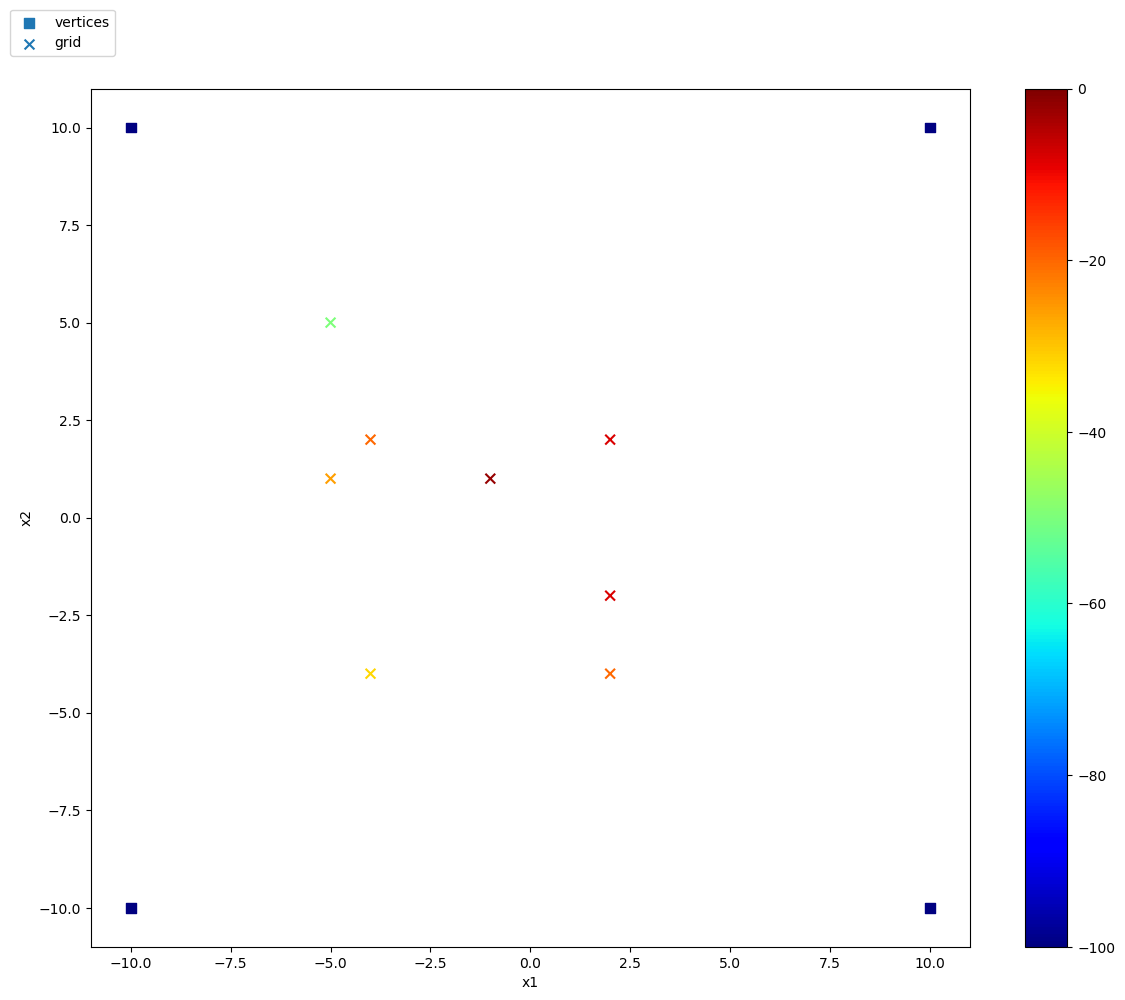

In [13]:
n_vertices=4
n_grid=8
random_state=1


run_initialize_visualization(n_vertices, n_grid, random_state)